In [1]:
from bigpython.mail import EmailClient

# 이메일 

## 이메일 읽기 

Email 클라이언트 설정

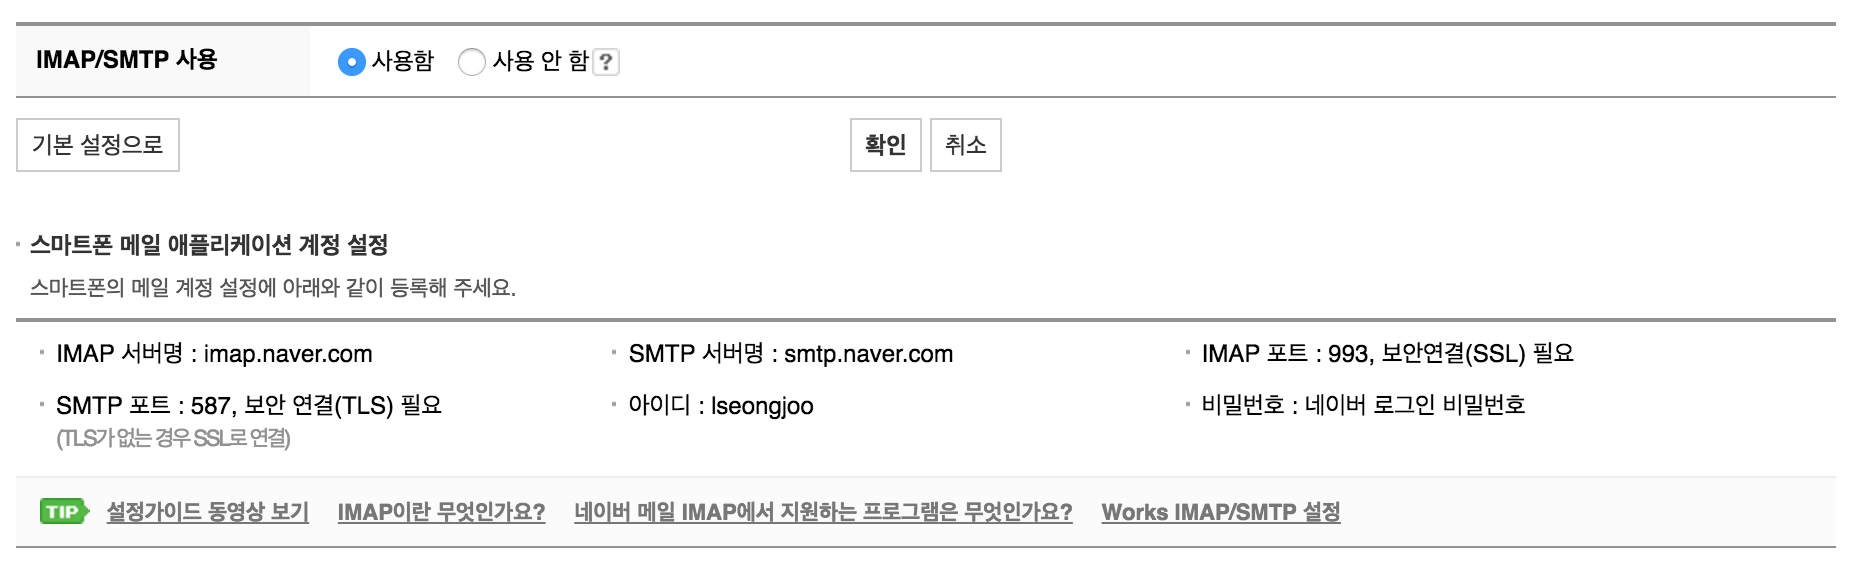

In [15]:
from IPython.display import Image
Image('naver_imap_config.png')

In [6]:
mail = EmailClient('naver.com')

## 로그인

설정 파일 활용

In [7]:
mail.login(configfile='login.cfg')

{b'EXISTS': 8,
 b'FLAGS': (b'\\Answered', b'\\Flagged', b'\\Deleted', b'\\Seen', b'\\Draft'),
 b'NOMODSEQ': [b''],
 b'PERMANENTFLAGS': (),
 b'READ-ONLY': [b''],
 b'RECENT': 0,
 b'UIDNEXT': 200,
 b'UIDVALIDITY': 0,
 b'UNSEEN': [b'2']}

제목 검색

In [18]:
message_ids = mail.search(['SUBJECT', '빅파이'])
for subject in mail.get_subjects(message_ids):
    print(subject['ID'], end=' ')
    print('{}'.format(''.join(subject['FROM'])), end='\t')
    print(subject['Subject'], end='\n')

192 이성주 <seongjoo@codebasic.co>	[빅파이] 업무자동화를 위한 파이썬-이메일
193 이성주 <seongjoo@codebasic.co>	[빅파이] 업무자동화를 위한 파이썬-이메일 첨부
194 이성주 <seongjoo@codebasic.co>	[빅파이] 업무자동화를 위한 파이썬-서식있는 이메일
195 이성주 <seongjoo@codebasic.co>	[빅파이] 업무자동화를 위한 파이썬-이메일 한글파일명 첨부


본문 출력

In [19]:
from IPython.core.display import display, HTML

for mid in message_ids:
    for content_type, text in mail.get_text(mid):
        print('Message ID: {}'.format(mid))
        if content_type == 'text/html':
            display(HTML(text))
        else:
            print('{}'.format(text), end='\n\n')

Message ID: 192
업무자동화를 위한 파이썬

이메일 자동으로 읽고 처리하기

Message ID: 193
첨부 파일 확인해 주세요. 감사합니다.



Message ID: 194
 	 	 
업무자동화를 위한 파이썬


Message ID: 194


Message ID: 195
과정개요 첨부 파일을 확인해 주세요.





### 첨부 파일

첨부 파일 목록 확인

In [20]:
for mid in message_ids:
    attachment_list = mail.show_attachments(mid)
    print('첨부파일: {}'.format(attachment_list))

첨부파일: []
첨부파일: ['curriculum.xlsx']
첨부파일: ['bg_pattern.jpg', 'note.jpg']
첨부파일: ['과정개요.xlsx']


첨부파일 다운로드

In [21]:
mail.download_attachments(message_ids[0])

[]

In [22]:
mail.download_attachments(message_ids[1])

['/Users/seongjoo/development/pyautomate/email/curriculum.xlsx']

In [23]:
mail.download_attachments(message_ids[2])

['/Users/seongjoo/development/pyautomate/email/bg_pattern.jpg',
 '/Users/seongjoo/development/pyautomate/email/note.jpg']

In [24]:
mail.download_attachments(message_ids[3])

['/Users/seongjoo/development/pyautomate/email/과정개요.xlsx']

첨부파일 다운로드 경로 지정

In [25]:
다운로드폴더 = '/Users/seongjoo/Downloads'
mail.download_attachments(message_ids[1], target_dir=다운로드폴더)

['/Users/seongjoo/Downloads/curriculum.xlsx']

로그아웃

In [26]:
mail.logout()

b'Logging out'

## 이메일 보내기 

In [4]:
제목 = '이성주가 이성주에게'
본문 = '고맙습니다\n감사합니다.'

In [ ]:
보낼주소 = input('보낼 주소: ')

In [8]:
result = mail.send_message(보낼주소, 제목, 본문)

비밀번호: ········


In [9]:
print(result)

{}
